In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(".\multiTimeline.csv", sep=",", skiprows=1, header=0)
cols = df.columns
df["slno"] = df.index
df["date"] = pd.to_datetime(df[cols[0]], format="%Y-%m-%d")
df["year"] = df[cols[0]].str.split("-").str[0]
df["month"] = df[cols[0]].str.split("-").str[1]
df["day"] = df[cols[0]].str.split("-").str[2]
df["item"] = cols[1].split(" ")[0][:-1]
df["region"] = cols[1].split(" ")[1][1:-1]
df["volume"] = df[cols[1]]
df.drop(cols, axis=1, inplace=True)
df.head()

,slno,date,year,month,day,item,region,volume
0,0,2021-02-14,2021,02,14,Oxygen,India,2
1,1,2021-02-15,2021,02,15,Oxygen,India,0
2,2,2021-02-16,2021,02,16,Oxygen,India,2
3,3,2021-02-17,2021,02,17,Oxygen,India,4
4,4,2021-02-18,2021,02,18,Oxygen,India,6


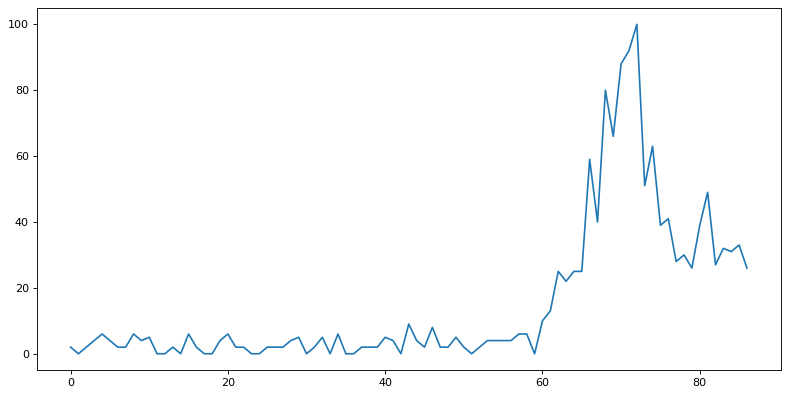

In [3]:
funtion_of_time = df.volume.values
t = df.slno.values
no_of_sample = len(funtion_of_time)
# Generate a 2 hertz sine wave that lasts for 5 seconds
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(t, funtion_of_time);

#### FFFT

In [4]:
funtion_of_freq = fft(funtion_of_time)

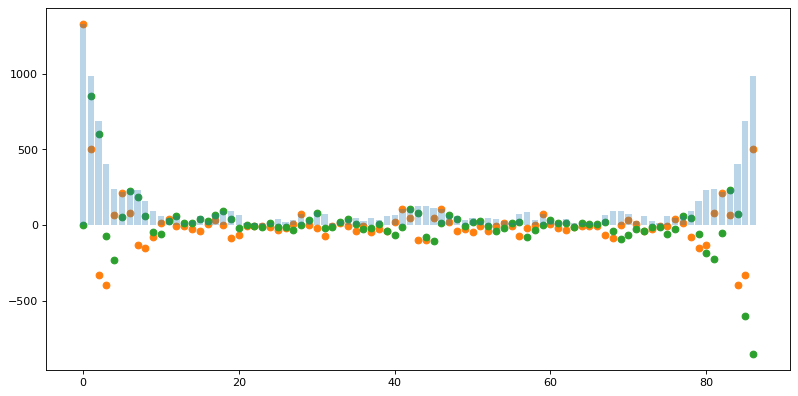

In [5]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(np.arange(0, no_of_sample), np.abs(funtion_of_freq), alpha=0.3)
plt.scatter(np.arange(0, no_of_sample), funtion_of_freq.real)
plt.scatter(np.arange(0, no_of_sample), funtion_of_freq.imag)
plt.show();

In [6]:
power = np.abs(funtion_of_freq)**2
sample_freq = fftfreq(no_of_sample, 1/(no_of_sample))
pos_mask = np.where(sample_freq > 0)
freq = sample_freq[pos_mask]
peak_freq = freq[power[pos_mask].argmax()]

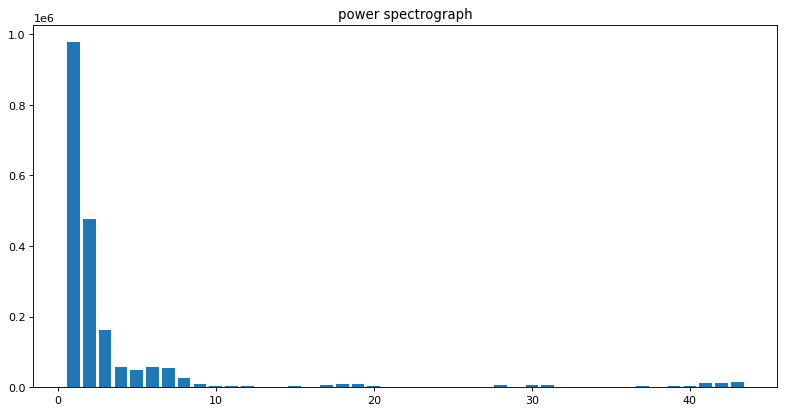

In [7]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(freq, power[pos_mask])
plt.title("power spectrograph")
plt.show();

In [8]:
peak_freq = 0
funtion_of_freq_clean = funtion_of_freq.copy()
funtion_of_freq_clean[sample_freq > peak_freq]=0
funtion_of_freq_clean[power>=500000]=0
funtion_of_time_clean = np.abs(ifft(funtion_of_freq_clean))

In [9]:
funtion_of_freq_clean_prm = funtion_of_freq.copy()
funtion_of_freq_clean_prm[sample_freq > peak_freq]=0
funtion_of_freq_clean_prm[power<=500000]=0
funtion_of_time_clean_prm = np.abs(ifft(funtion_of_freq_clean_prm))

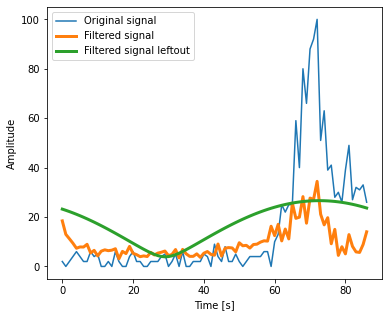

In [10]:
plt.figure(figsize=(6, 5))
plt.plot(t, funtion_of_time, label='Original signal')
plt.plot(t, funtion_of_time_clean, linewidth=3, label='Filtered signal')
plt.plot(t, funtion_of_time_clean_prm, linewidth=3, label='Filtered signal leftout')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')